In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns

import missingno as msno 

import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
# from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [64]:
#Let's Load the data using panda library
df = pd.read_csv('kawasaki_disease_dataset.csv')

In [65]:
#Let's print the first 5 records of the data
df.head()

,Patient ID,Date of Diagnosis,Age at Diagnosis,Gender,Ethnicity,Location,Fever Duration,Symptoms,Laboratory Tests,Echocardiography,Treatment Approach,Clinical Outcomes,Complications,Follow-up Visits,Long-Term Effects
0,11596,2017-09-26,6,Male,Caucasian,"CityA, StateZ, Country2",25,Fever,Elevated,Normal,Aspirin,Worsening,Myocarditis,Scheduled,Mild
1,37960,2015-01-02,1,Female,Asian,"CityC, StateX, Country2",9,Rash,Elevated,Normal,Aspirin,Improvement,Myocarditis,Not Scheduled,NaN
2,81187,2021-07-08,4,Male,African American,"CityB, StateZ, Country2",8,Fever,Elevated,Normal,Aspirin,Improvement,Myocarditis,Not Scheduled,NaN
3,52559,2019-11-11,2,Male,African American,"CityA, StateY, Country1",19,Rash,Normal,Normal,Aspirin,Worsening,Coronary Artery Aneurysm,Not Scheduled,Severe
4,88177,2015-12-06,8,Male,African American,"CityB, StateY, Country3",28,Rash,Normal,Normal,Aspirin,Stable,Pericarditis,Scheduled,Mild


In [66]:
#Let's Print the Last 5 records of the dataset
df.tail()

,Patient ID,Date of Diagnosis,Age at Diagnosis,Gender,Ethnicity,Location,Fever Duration,Symptoms,Laboratory Tests,Echocardiography,Treatment Approach,Clinical Outcomes,Complications,Follow-up Visits,Long-Term Effects
2747,35992,2015-10-10,15,Female,Asian,"CityC, StateX, Country2",23,Red Eyes,Normal,Abnormal,IVIG,Worsening,Pericarditis,Scheduled,Mild
2748,75899,2020-10-30,10,Male,Caucasian,"CityC, StateZ, Country2",26,Fever,Normal,Normal,IVIG + Aspirin,Stable,Myocarditis,Scheduled,Mild
2749,51431,2017-07-19,6,Female,Other,"CityA, StateY, Country1",25,Rash,Normal,Normal,Aspirin,Worsening,NaN,Scheduled,Mild
2750,59023,2020-08-02,15,Male,Hispanic,"CityB, StateY, Country3",21,Swollen Hands/Feet,Elevated,Abnormal,Aspirin,Improvement,Pericarditis,Not Scheduled,Severe
2751,45902,2022-10-27,4,Female,Hispanic,"CityB, StateZ, Country3",12,Swollen Hands/Feet,Elevated,Normal,IVIG + Aspirin,Stable,Pericarditis,Not Scheduled,Mild


### **Let's Understand More About the Data**

#### **Feature Description**

Patient ID: A unique identifier for each patient. 
Date of Diagnosis: The specific date when Kawasaki Disease was diagnosed. 
Age at Diagnosis: The age of the patient at the time of Kawasaki Disease diagnosis. 
Gender: The gender (male or female) of the patient. 
Ethnicity: The ethnicity or racial background of the patient.
Location: The geographic location of the patient (city, state, country). 
Fever Duration: The duration of fever before diagnosis. 
Symptoms: A list of presenting symptoms such as rash, red eyes, swollen hands/feet, etc. 
Laboratory Tests: Results of relevant laboratory tests, such as elevated inflammatory markers. 
Echocardiography: Findings from echocardiographic assessments, crucial for assessing heart involvement. 
Treatment Approach: Details about the treatment strategy adopted, including IVIG, aspirin, etc. 
Clinical Outcomes: The progression of symptoms and overall health status after treatment. 
Complications: Any complications or adverse events associated with Kawasaki Disease. 
Follow-up Visits: Information about follow-up visits or assessments after initial treatment. 
Long-Term Effects: Data on any long-term effects or implications of Kawasaki Disease.

In [67]:
#Printing the shape of the dataset
df.shape

(2752, 15)

**Here we have 40000 observations with 15 features in our dataset**

In [68]:
#Getting the data types of all the columns
df.dtypes

Patient ID             int64
Date of Diagnosis     object
Age at Diagnosis       int64
Gender                object
Ethnicity             object
Location              object
Fever Duration         int64
Symptoms              object
Laboratory Tests      object
Echocardiography      object
Treatment Approach    object
Clinical Outcomes     object
Complications         object
Follow-up Visits      object
Long-Term Effects     object
dtype: object

**Here in our dataset we have both object and float data types.**

In [69]:
#check details about the data set
print("Here is the information about our data set which includes the number of columns, number of rows, data types , null counts and the memory size as well :")
df.info()
p=0.31

Here is the information about our data set which includes the number of columns, number of rows, data types , null counts and the memory size as well :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2752 entries, 0 to 2751
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Patient ID          2752 non-null   int64 
 1   Date of Diagnosis   2752 non-null   object
 2   Age at Diagnosis    2752 non-null   int64 
 3   Gender              2752 non-null   object
 4   Ethnicity           2752 non-null   object
 5   Location            2752 non-null   object
 6   Fever Duration      2752 non-null   int64 
 7   Symptoms            2752 non-null   object
 8   Laboratory Tests    2752 non-null   object
 9   Echocardiography    2752 non-null   object
 10  Treatment Approach  2752 non-null   object
 11  Clinical Outcomes   2752 non-null   object
 12  Complications       2083 non-null   object
 13  Follow-up Visits

In [70]:
#Here is the unique values in our data
print("The unique values in each and every column in our data are as below:")
df.nunique()

The unique values in each and every column in our data are as below:


Patient ID            2625
Date of Diagnosis     1880
Age at Diagnosis        18
Gender                   2
Ethnicity                5
Location                27
Fever Duration          30
Symptoms                 5
Laboratory Tests         2
Echocardiography         2
Treatment Approach       3
Clinical Outcomes        3
Complications            3
Follow-up Visits         2
Long-Term Effects        2
dtype: int64

In [71]:
print('The statistical information about our data set is as below :')
df.describe(include='all').T

The statistical information about our data set is as below :


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Patient ID,2752.0,NaN,NaN,NaN,55549.28125,25910.322813,10001.0,33747.0,56249.5,77469.5,99991.0
Date of Diagnosis,2752,1880,2023-03-29,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age at Diagnosis,2752.0,NaN,NaN,NaN,9.364099,5.134936,1.0,5.0,9.0,14.0,18.0
Gender,2752,2,Female,1415,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ethnicity,2752,5,Asian,607,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,2752,27,"CityA, StateY, Country2",119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fever Duration,2752.0,NaN,NaN,NaN,15.699855,8.608621,1.0,8.0,16.0,23.0,30.0
Symptoms,2752,5,Rash,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Laboratory Tests,2752,2,Elevated,1386,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Echocardiography,2752,2,Normal,1413,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**The above table shows the statistical information about the each and every column of our data set.**

In [72]:
# Let's Check the duplicated values in our data
df.duplicated().sum()

91

**From the above we came to know that there is no duplicate values in our data set.**

# **Exploratory Data Analysis (EDA)**

In [73]:
#Let's check the null values present in the data set
df.isnull().sum()

Patient ID              0
Date of Diagnosis       0
Age at Diagnosis        0
Gender                  0
Ethnicity               0
Location                0
Fever Duration          0
Symptoms                0
Laboratory Tests        0
Echocardiography        0
Treatment Approach      0
Clinical Outcomes       0
Complications         669
Follow-up Visits        0
Long-Term Effects     902
dtype: int64

**From the above we found that there are some missing values in emp_title,emp_length,title, revol_util, mort_acc and Pub_rec_bankruptcies column**

# It creates a dataframe called 'missing' that calculates the percentage of missing values in each column of the 'df' dataset. It then plots a graph using seaborn library, displaying the percentage of missing values for each column as data points on the y-axis. The x-axis represents the column names. This graph helps visualize the extent of missing data in the dataset, allowing for easy identification of columns with high percentages of missing values.

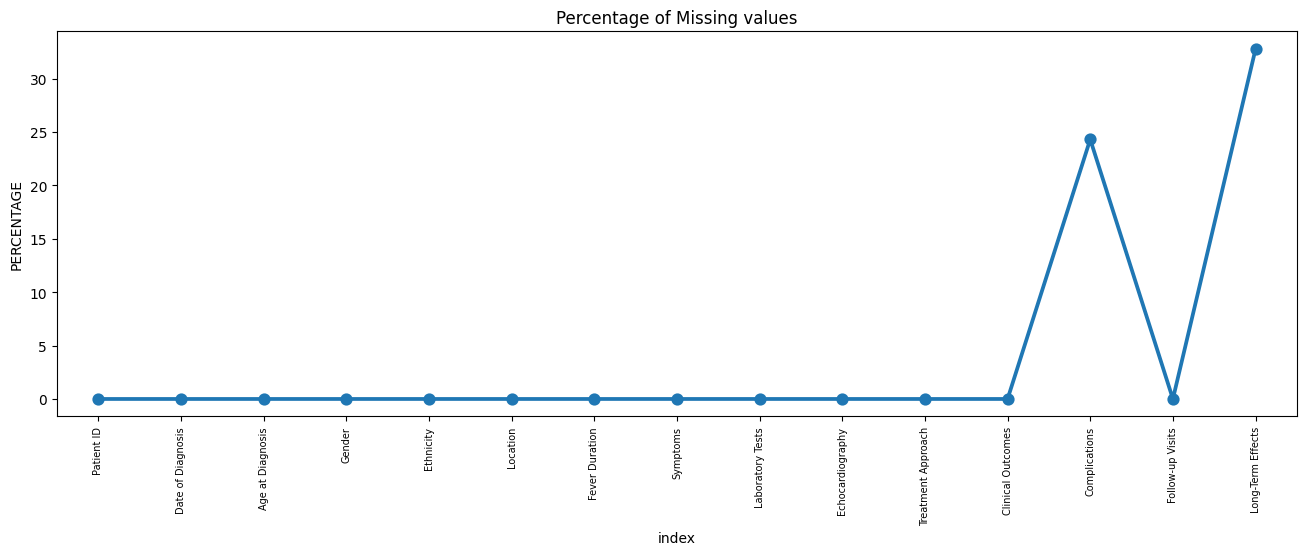

In [74]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

<Axes: >

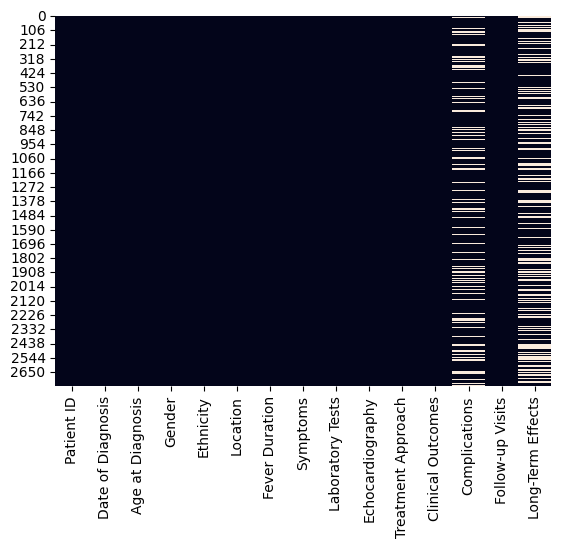

In [75]:
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

In [76]:
print("Here are the columnn names of our data set :")
df.columns

Here are the columnn names of our data set :


Index(['Patient ID', 'Date of Diagnosis', 'Age at Diagnosis', 'Gender',
       'Ethnicity', 'Location', 'Fever Duration', 'Symptoms',
       'Laboratory Tests', 'Echocardiography', 'Treatment Approach',
       'Clinical Outcomes', 'Complications', 'Follow-up Visits',
       'Long-Term Effects'],
      dtype='object')

In [77]:
df

,Patient ID,Date of Diagnosis,Age at Diagnosis,Gender,Ethnicity,Location,Fever Duration,Symptoms,Laboratory Tests,Echocardiography,Treatment Approach,Clinical Outcomes,Complications,Follow-up Visits,Long-Term Effects
0,11596,2017-09-26,6,Male,Caucasian,"CityA, StateZ, Country2",25,Fever,Elevated,Normal,Aspirin,Worsening,Myocarditis,Scheduled,Mild
1,37960,2015-01-02,1,Female,Asian,"CityC, StateX, Country2",9,Rash,Elevated,Normal,Aspirin,Improvement,Myocarditis,Not Scheduled,NaN
2,81187,2021-07-08,4,Male,African American,"CityB, StateZ, Country2",8,Fever,Elevated,Normal,Aspirin,Improvement,Myocarditis,Not Scheduled,NaN
3,52559,2019-11-11,2,Male,African American,"CityA, StateY, Country1",19,Rash,Normal,Normal,Aspirin,Worsening,Coronary Artery Aneurysm,Not Scheduled,Severe
4,88177,2015-12-06,8,Male,African American,"CityB, StateY, Country3",28,Rash,Normal,Normal,Aspirin,Stable,Pericarditis,Scheduled,Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747,35992,2015-10-10,15,Female,Asian,"CityC, StateX, Country2",23,Red Eyes,Normal,Abnormal,IVIG,Worsening,Pericarditis,Scheduled,Mild
2748,75899,2020-10-30,10,Male,Caucasian,"CityC, StateZ, Country2",26,Fever,Normal,Normal,IVIG + Aspirin,Stable,Myocarditis,Scheduled,Mild
2749,51431,2017-07-19,6,Female,Other,"CityA, StateY, Country1",25,Rash,Normal,Normal,Aspirin,Worsening,NaN,Scheduled,Mild
2750,59023,2020-08-02,15,Male,Hispanic,"CityB, StateY, Country3",21,Swollen Hands/Feet,Elevated,Abnormal,Aspirin,Improvement,Pericarditis,Not Scheduled,Severe


C:\Users\meena\AppData\Local\Temp\ipykernel_36616\1220908146.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Patient ID', ylabel='Density'>

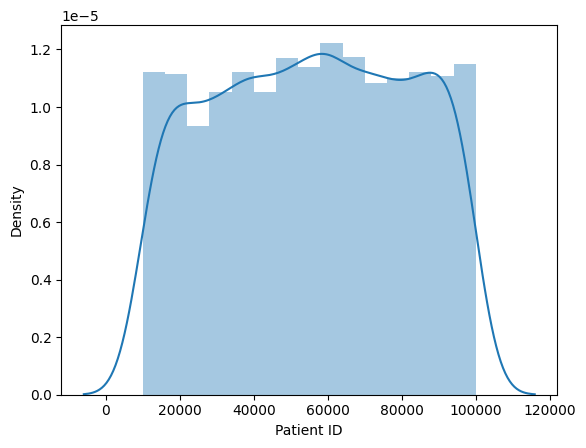

In [78]:
#  distribution plot for Patient ID column
sns.distplot(df['Patient ID'])

C:\Users\meena\AppData\Local\Temp\ipykernel_36616\2481027775.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Age at Diagnosis', ylabel='Density'>

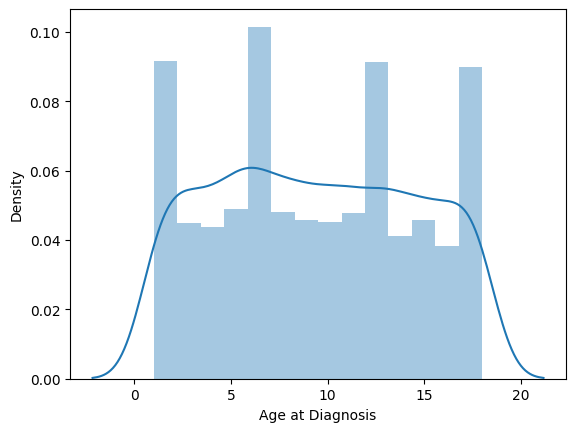

In [79]:
#  distribution plot for Date of Diagnosis column
sns.distplot(df['Age at Diagnosis'])

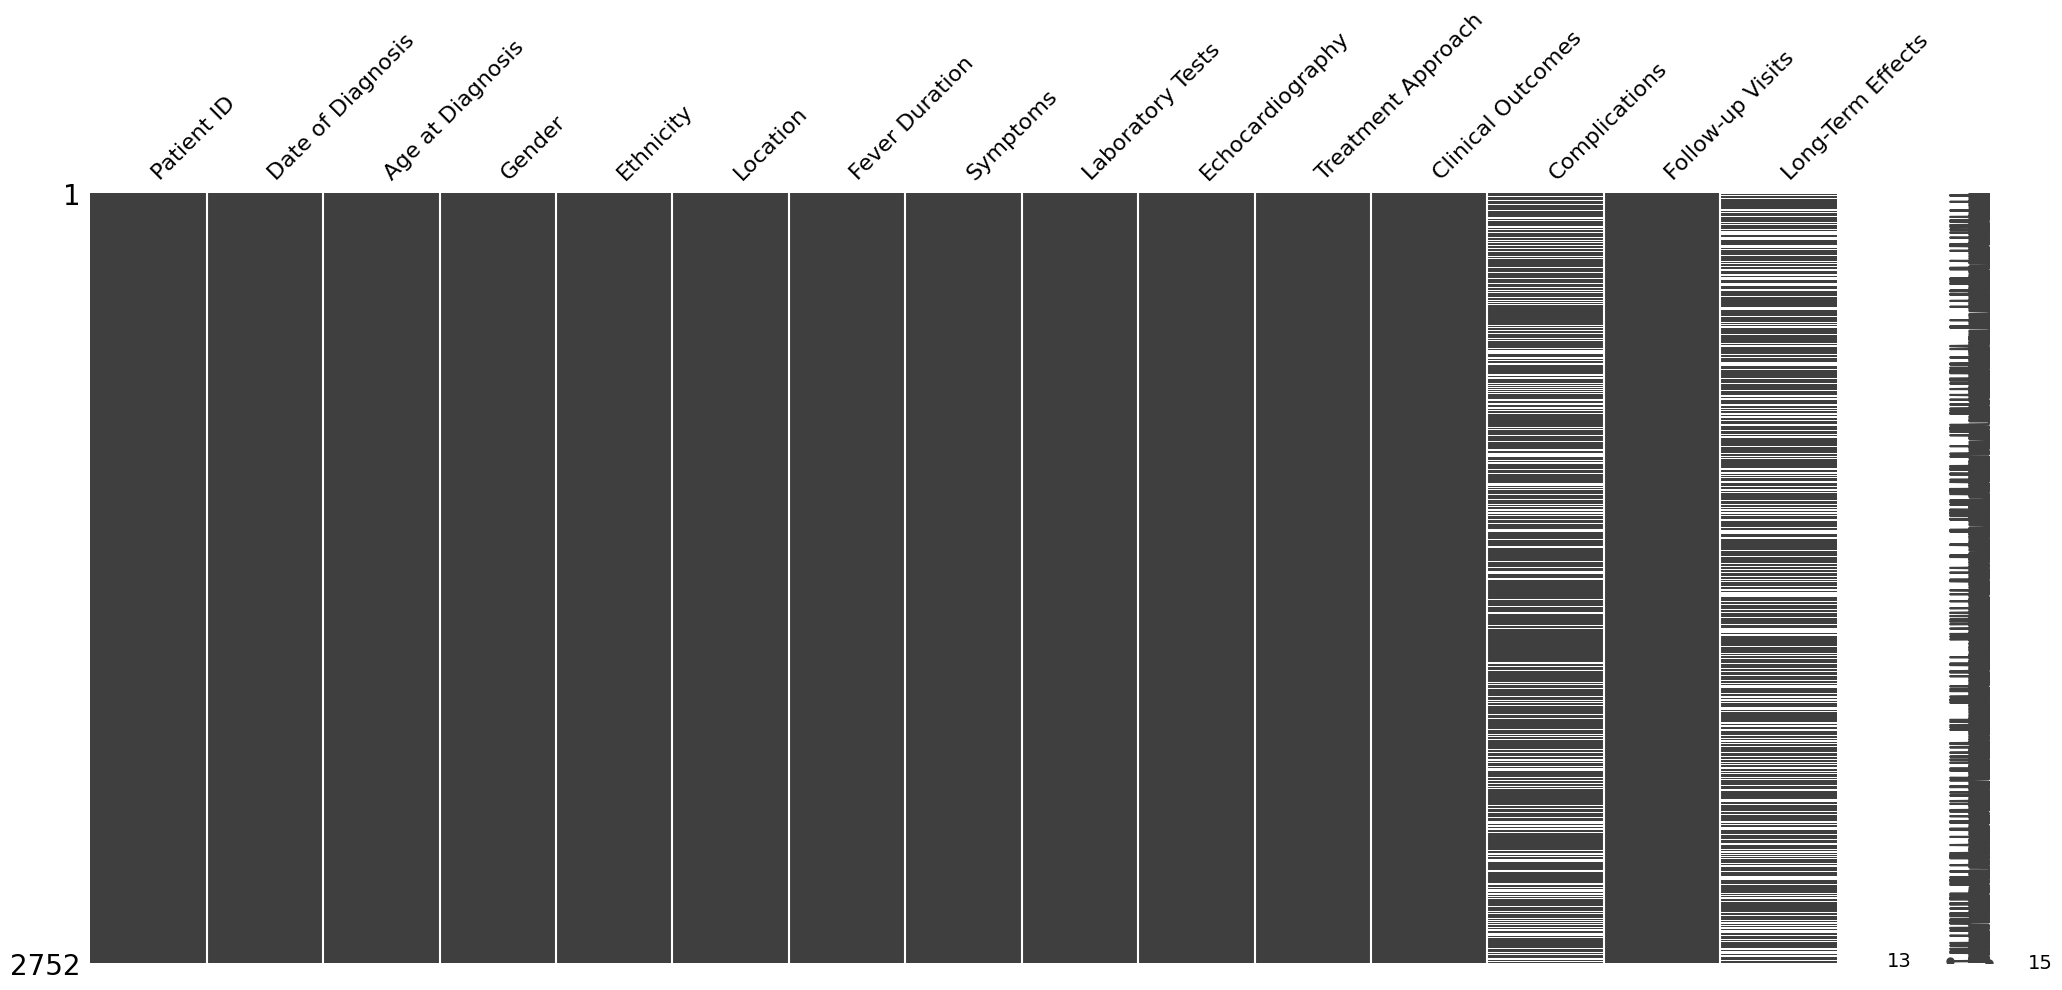

In [80]:
# generates a missing value matrix plot to visualize the presence of missing data in the DataFrame
msno.matrix(df)
plt.show()

It generates a bar chart using Seaborn, displaying the count of categories within the 'Ethnicity' column of a DataFrame, with rotated x-axis labels for improved readability.

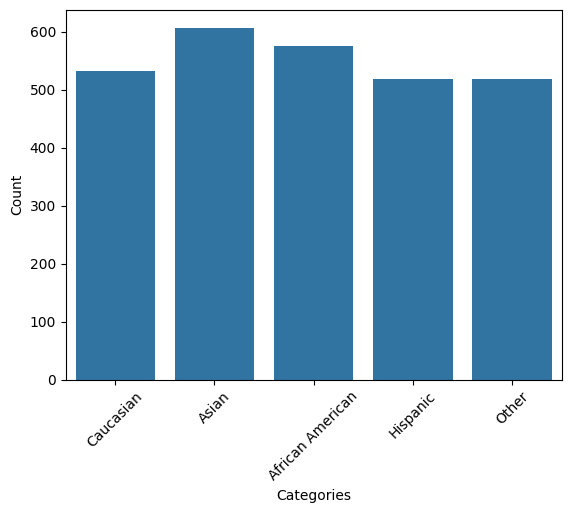

In [81]:
# Create a bar chart
sns.countplot(data=df, x='Ethnicity')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

It creates a stacked bar chart that visualizes the relationship between two categorical variables, "Treatment Approach" and "Echocardiography," showing the count of each category within different treatment approaches.

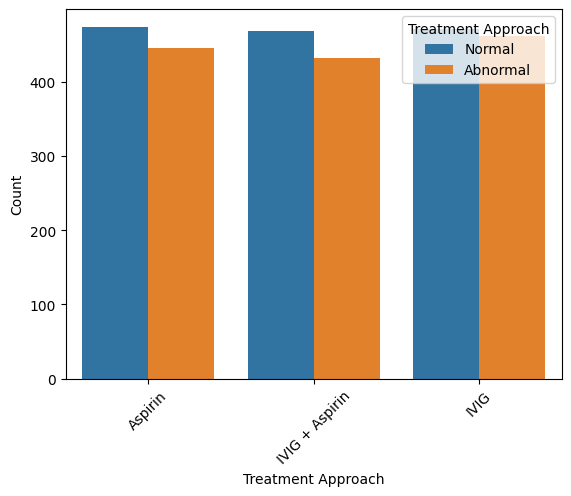

In [82]:
# Create a stacked bar chart
sns.countplot(data=df, x='Treatment Approach', hue='Echocardiography')
# plt.title('Relationship between Two Categorical Variables')
plt.xlabel('Treatment Approach')
plt.ylabel('Count')
plt.legend(title='Treatment Approach', loc='upper right')
plt.xticks(rotation=45)
plt.show()

# **Data Preprocessing**

In [83]:
df.dtypes

Patient ID             int64
Date of Diagnosis     object
Age at Diagnosis       int64
Gender                object
Ethnicity             object
Location              object
Fever Duration         int64
Symptoms              object
Laboratory Tests      object
Echocardiography      object
Treatment Approach    object
Clinical Outcomes     object
Complications         object
Follow-up Visits      object
Long-Term Effects     object
dtype: object

In [84]:
print("After the null value imputation the number of missing value count is :")
df.isnull().sum()

After the null value imputation the number of missing value count is :


Patient ID              0
Date of Diagnosis       0
Age at Diagnosis        0
Gender                  0
Ethnicity               0
Location                0
Fever Duration          0
Symptoms                0
Laboratory Tests        0
Echocardiography        0
Treatment Approach      0
Clinical Outcomes       0
Complications         669
Follow-up Visits        0
Long-Term Effects     902
dtype: int64

#### **Labelencoding of Categorical Features**

In [85]:
df.shape

(2752, 15)

In [86]:
df.columns

Index(['Patient ID', 'Date of Diagnosis', 'Age at Diagnosis', 'Gender',
       'Ethnicity', 'Location', 'Fever Duration', 'Symptoms',
       'Laboratory Tests', 'Echocardiography', 'Treatment Approach',
       'Clinical Outcomes', 'Complications', 'Follow-up Visits',
       'Long-Term Effects'],
      dtype='object')

The 'drop' method in pandas is used to remove specific columns or rows from a DataFrame. It allows for data manipulation by excluding the specified data, either in-place or by creating a new DataFrame without the dropped elements.

In [87]:
# removes the 'Patient ID' column from the DataFrame 'df' and makes this change in-place.
df.drop('Patient ID',axis=1 , inplace=True)

In [88]:
# removes the 'Date of Diagnosis' column from the DataFrame 'df' and makes this change in-place.
df.drop('Date of Diagnosis',axis=1 , inplace=True)

In [89]:
#Printing the shape of the dataset
df.shape

(2752, 13)

In [90]:
df

,Age at Diagnosis,Gender,Ethnicity,Location,Fever Duration,Symptoms,Laboratory Tests,Echocardiography,Treatment Approach,Clinical Outcomes,Complications,Follow-up Visits,Long-Term Effects
0,6,Male,Caucasian,"CityA, StateZ, Country2",25,Fever,Elevated,Normal,Aspirin,Worsening,Myocarditis,Scheduled,Mild
1,1,Female,Asian,"CityC, StateX, Country2",9,Rash,Elevated,Normal,Aspirin,Improvement,Myocarditis,Not Scheduled,NaN
2,4,Male,African American,"CityB, StateZ, Country2",8,Fever,Elevated,Normal,Aspirin,Improvement,Myocarditis,Not Scheduled,NaN
3,2,Male,African American,"CityA, StateY, Country1",19,Rash,Normal,Normal,Aspirin,Worsening,Coronary Artery Aneurysm,Not Scheduled,Severe
4,8,Male,African American,"CityB, StateY, Country3",28,Rash,Normal,Normal,Aspirin,Stable,Pericarditis,Scheduled,Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747,15,Female,Asian,"CityC, StateX, Country2",23,Red Eyes,Normal,Abnormal,IVIG,Worsening,Pericarditis,Scheduled,Mild
2748,10,Male,Caucasian,"CityC, StateZ, Country2",26,Fever,Normal,Normal,IVIG + Aspirin,Stable,Myocarditis,Scheduled,Mild
2749,6,Female,Other,"CityA, StateY, Country1",25,Rash,Normal,Normal,Aspirin,Worsening,NaN,Scheduled,Mild
2750,15,Male,Hispanic,"CityB, StateY, Country3",21,Swollen Hands/Feet,Elevated,Abnormal,Aspirin,Improvement,Pericarditis,Not Scheduled,Severe


It creates a pie chart to visualize the gender distribution in a DataFrame, highlighting the "Male" category with a slight explosion effect.

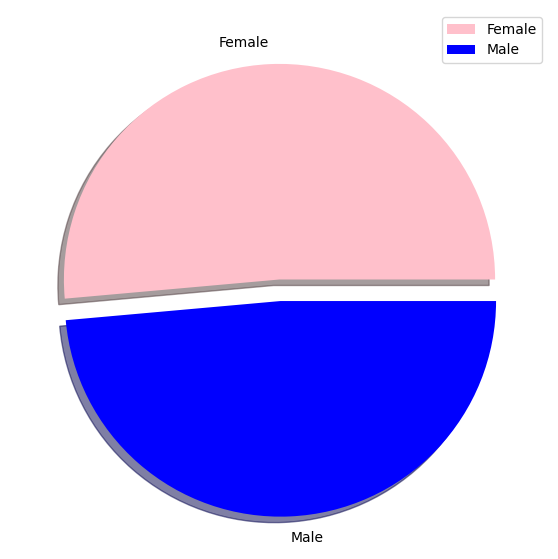

In [91]:
plt.figure(figsize=(7,7))
size=df['Gender'].value_counts()
label=['Female','Male']
color=['Pink','Blue']
explode=[0,0.1]
plt.pie(size,explode=explode,labels=label,colors=color,shadow=True)
plt.legend()
plt.show()

LabelEncoder is a preprocessing technique used in machine learning to convert categorical labels into numerical values, allowing algorithms to work with categorical data by assigning a unique integer to each category.

In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [93]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Ethnicity'] = le.fit_transform(df['Ethnicity'])
df['Location'] = le.fit_transform(df['Location'])
df['Symptoms'] = le.fit_transform(df['Symptoms'])
df['Laboratory Tests'] = le.fit_transform(df['Laboratory Tests'])
df['Echocardiography'] = le.fit_transform(df['Echocardiography'])
df['Treatment Approach'] = le.fit_transform(df['Treatment Approach'])
df['Clinical Outcomes'] = le.fit_transform(df['Clinical Outcomes'])
df['Complications'] = le.fit_transform(df['Complications'])
df['Follow-up Visits'] = le.fit_transform(df['Follow-up Visits'])
df['Long-Term Effects'] = le.fit_transform(df['Long-Term Effects'])


In [94]:
df.head()

,Age at Diagnosis,Gender,Ethnicity,Location,Fever Duration,Symptoms,Laboratory Tests,Echocardiography,Treatment Approach,Clinical Outcomes,Complications,Follow-up Visits,Long-Term Effects
0,6,1,2,7,25,0,0,1,0,2,1,1,0
1,1,0,1,19,9,1,0,1,0,0,1,0,2
2,4,1,0,16,8,0,0,1,0,0,1,0,2
3,2,1,0,3,19,1,1,1,0,2,0,0,1
4,8,1,0,14,28,1,1,1,0,1,2,1,0


In [95]:
#Getting the data types of all the columns
df.dtypes

Age at Diagnosis      int64
Gender                int32
Ethnicity             int32
Location              int32
Fever Duration        int64
Symptoms              int32
Laboratory Tests      int32
Echocardiography      int32
Treatment Approach    int32
Clinical Outcomes     int32
Complications         int32
Follow-up Visits      int32
Long-Term Effects     int32
dtype: object

**Here after applying the Label Encoder all the categorical columns has been converted into numeric.**

In [96]:
#check details about the data set
print("Here is the information about our data set which includes the number of columns, number of rows, data types , null counts and the memory size as well :")
df.info()

Here is the information about our data set which includes the number of columns, number of rows, data types , null counts and the memory size as well :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2752 entries, 0 to 2751
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age at Diagnosis    2752 non-null   int64
 1   Gender              2752 non-null   int32
 2   Ethnicity           2752 non-null   int32
 3   Location            2752 non-null   int32
 4   Fever Duration      2752 non-null   int64
 5   Symptoms            2752 non-null   int32
 6   Laboratory Tests    2752 non-null   int32
 7   Echocardiography    2752 non-null   int32
 8   Treatment Approach  2752 non-null   int32
 9   Clinical Outcomes   2752 non-null   int32
 10  Complications       2752 non-null   int32
 11  Follow-up Visits    2752 non-null   int32
 12  Long-Term Effects   2752 non-null   int32
dtypes: int32(11), int64(2)
memory u

#### **Feature Selection**

Let's plot the correlation plot to select the features

A correlation matrix is a square table that displays the correlation coefficients between many variables. It is used to understand how variables are related to each other. In a correlation matrix, each cell represents the correlation between two variables, typically ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no correlation. Positive values suggest that variables tend to increase together, while negative values indicate that one tends to decrease as the other increases. It's a valuable tool for data analysis, helping to identify relationships, dependencies, and potential multicollinearity among variables in datasets.

<Axes: >

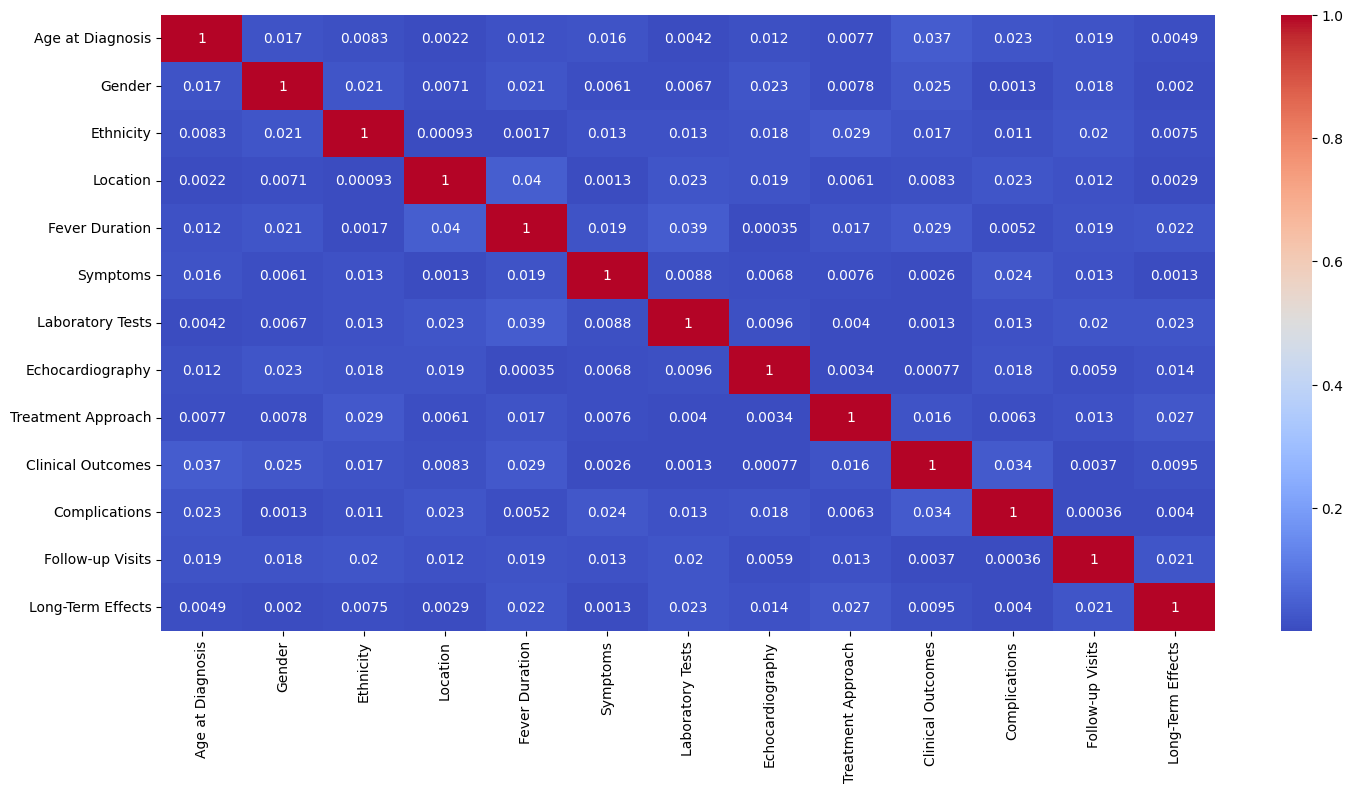

In [97]:
## plot the Correlation matrix
plt.figure(figsize=(17,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Let's save the correlation value in csv format

In [98]:
corr = df.corr()

In [99]:
corr

,Age at Diagnosis,Gender,Ethnicity,Location,Fever Duration,Symptoms,Laboratory Tests,Echocardiography,Treatment Approach,Clinical Outcomes,Complications,Follow-up Visits,Long-Term Effects
Age at Diagnosis,1.000000,0.016739,-0.008312,0.002235,-0.012066,-0.016215,-0.004156,-0.011537,0.007654,-0.037069,-0.022953,0.019443,-0.004889
Gender,0.016739,1.000000,-0.020776,-0.007116,-0.020670,-0.006103,-0.006750,0.022582,-0.007842,-0.025202,-0.001346,-0.017596,-0.001991
Ethnicity,-0.008312,-0.020776,1.000000,-0.000927,-0.001654,0.013000,-0.012987,-0.017917,-0.028613,0.016807,-0.010661,0.020306,0.007542
Location,0.002235,-0.007116,-0.000927,1.000000,0.040389,-0.001280,0.022617,0.019182,-0.006116,-0.008349,-0.023151,0.012093,-0.002925
Fever Duration,-0.012066,-0.020670,-0.001654,0.040389,1.000000,0.018864,-0.039264,0.000347,0.016841,-0.028568,-0.005160,0.018787,0.021607
Symptoms,-0.016215,-0.006103,0.013000,-0.001280,0.018864,1.000000,-0.008761,-0.006820,-0.007599,-0.002593,0.024124,-0.013335,0.001297
Laboratory Tests,-0.004156,-0.006750,-0.012987,0.022617,-0.039264,-0.008761,1.000000,0.009647,0.003961,-0.001256,-0.012848,0.020137,0.023184
Echocardiography,-0.011537,0.022582,-0.017917,0.019182,0.000347,-0.006820,0.009647,1.000000,0.003358,-0.000773,0.017812,0.005913,-0.014112
Treatment Approach,0.007654,-0.007842,-0.028613,-0.006116,0.016841,-0.007599,0.003961,0.003358,1.000000,-0.016428,0.006269,-0.013227,-0.026993
Clinical Outcomes,-0.037069,-0.025202,0.016807,-0.008349,-0.028568,-0.002593,-0.001256,-0.000773,-0.016428,1.000000,0.034311,-0.003664,0.009451


In [100]:
# corr.to_csv('correlation.csv')

In [101]:
import numpy as np

# Create correlation matrix
corr_matrix = df.corr().abs()

In [102]:
corr_matrix

,Age at Diagnosis,Gender,Ethnicity,Location,Fever Duration,Symptoms,Laboratory Tests,Echocardiography,Treatment Approach,Clinical Outcomes,Complications,Follow-up Visits,Long-Term Effects
Age at Diagnosis,1.000000,0.016739,0.008312,0.002235,0.012066,0.016215,0.004156,0.011537,0.007654,0.037069,0.022953,0.019443,0.004889
Gender,0.016739,1.000000,0.020776,0.007116,0.020670,0.006103,0.006750,0.022582,0.007842,0.025202,0.001346,0.017596,0.001991
Ethnicity,0.008312,0.020776,1.000000,0.000927,0.001654,0.013000,0.012987,0.017917,0.028613,0.016807,0.010661,0.020306,0.007542
Location,0.002235,0.007116,0.000927,1.000000,0.040389,0.001280,0.022617,0.019182,0.006116,0.008349,0.023151,0.012093,0.002925
Fever Duration,0.012066,0.020670,0.001654,0.040389,1.000000,0.018864,0.039264,0.000347,0.016841,0.028568,0.005160,0.018787,0.021607
Symptoms,0.016215,0.006103,0.013000,0.001280,0.018864,1.000000,0.008761,0.006820,0.007599,0.002593,0.024124,0.013335,0.001297
Laboratory Tests,0.004156,0.006750,0.012987,0.022617,0.039264,0.008761,1.000000,0.009647,0.003961,0.001256,0.012848,0.020137,0.023184
Echocardiography,0.011537,0.022582,0.017917,0.019182,0.000347,0.006820,0.009647,1.000000,0.003358,0.000773,0.017812,0.005913,0.014112
Treatment Approach,0.007654,0.007842,0.028613,0.006116,0.016841,0.007599,0.003961,0.003358,1.000000,0.016428,0.006269,0.013227,0.026993
Clinical Outcomes,0.037069,0.025202,0.016807,0.008349,0.028568,0.002593,0.001256,0.000773,0.016428,1.000000,0.034311,0.003664,0.009451


In [103]:
# Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# upper

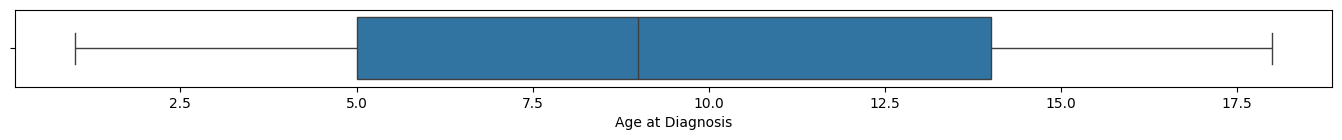

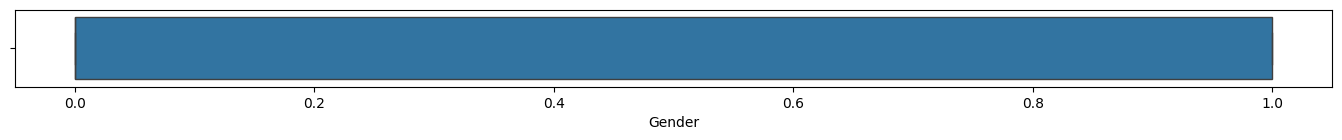

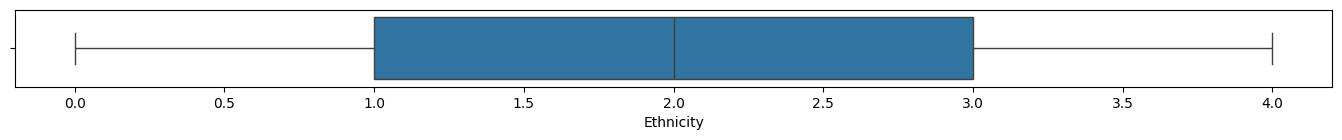

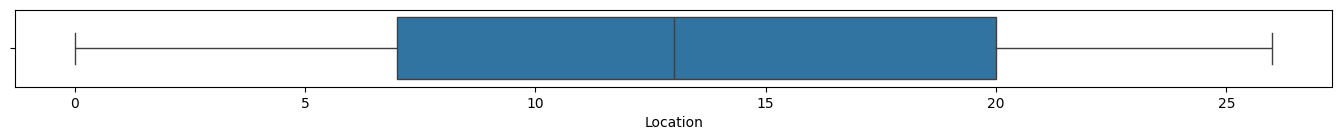

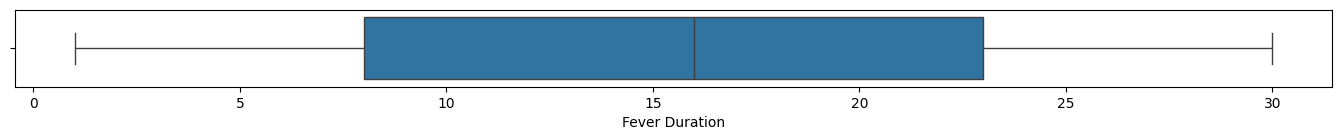

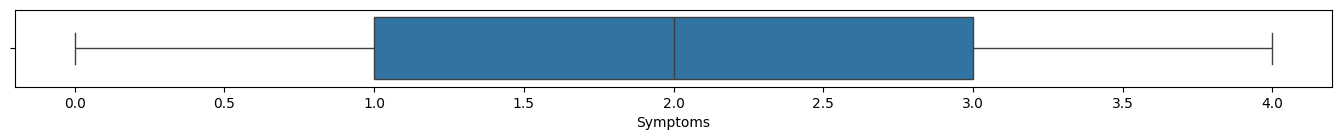

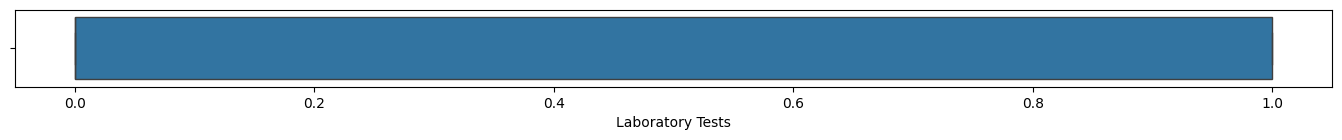

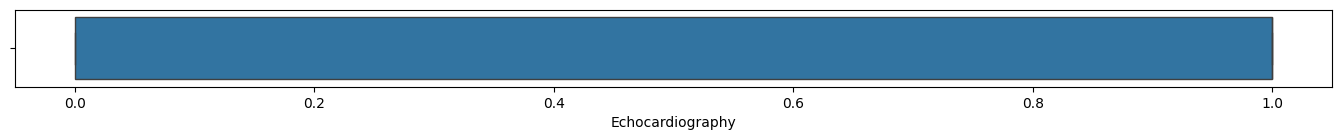

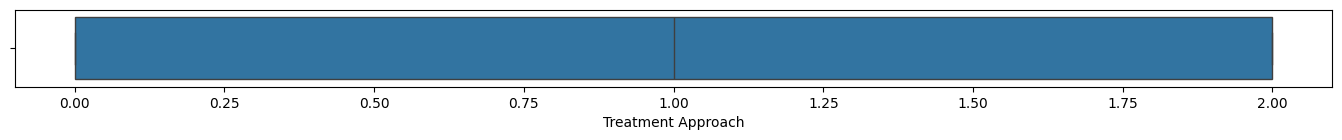

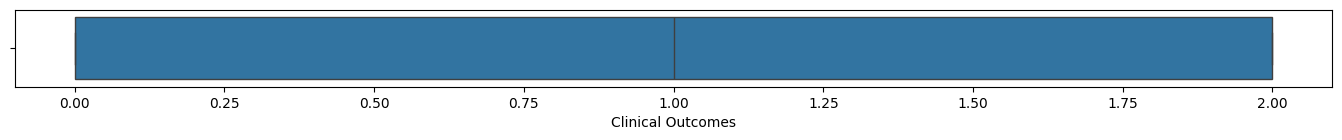

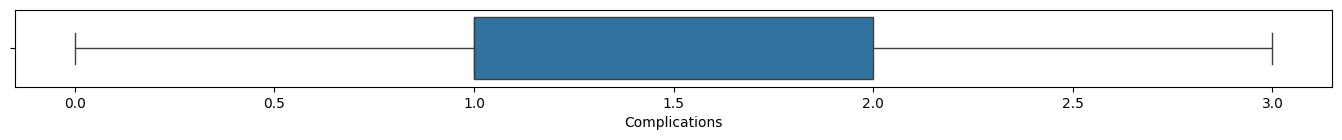

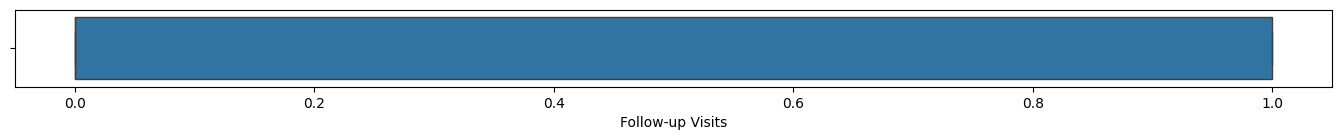

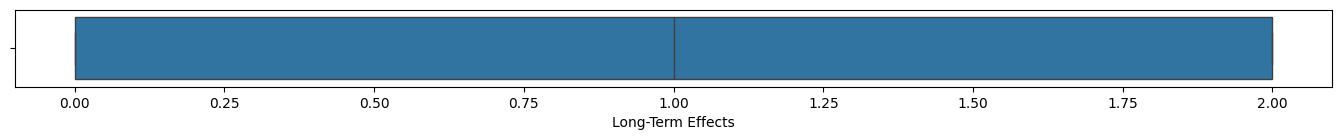

In [104]:
# Univariate Analysis
#Printing boxplot for each numerical column present in the data set
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)
plt.show()

C:\Users\meena\AppData\Local\Temp\ipykernel_36616\1747525221.py:4: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



<Figure size 1700x100 with 0 Axes>

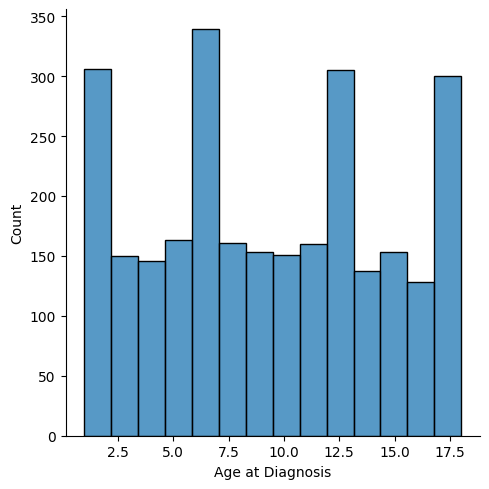

<Figure size 1700x100 with 0 Axes>

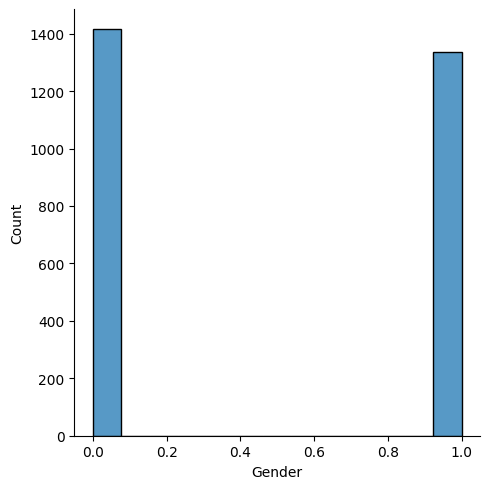

<Figure size 1700x100 with 0 Axes>

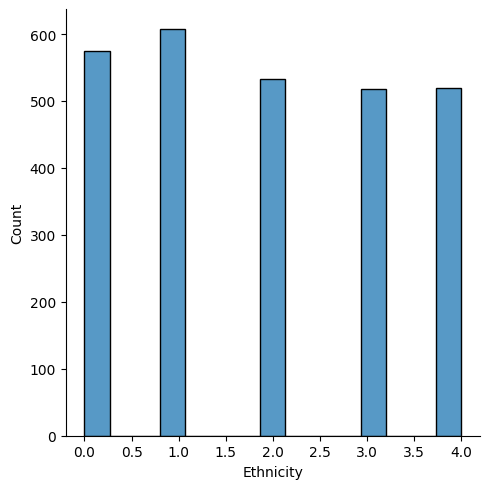

<Figure size 1700x100 with 0 Axes>

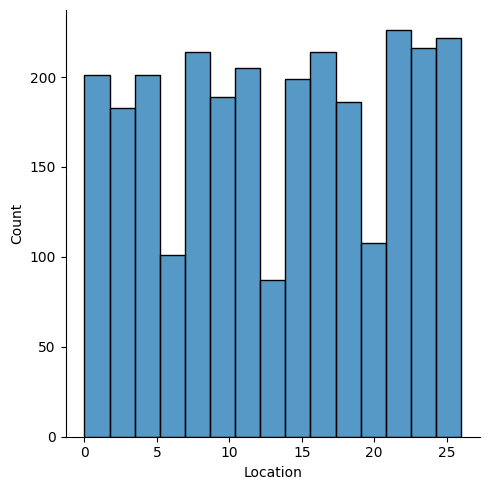

<Figure size 1700x100 with 0 Axes>

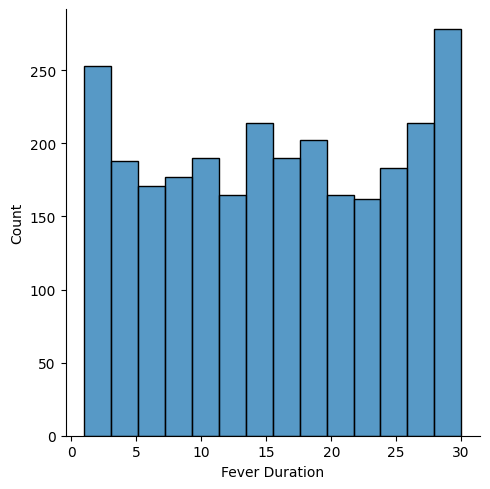

<Figure size 1700x100 with 0 Axes>

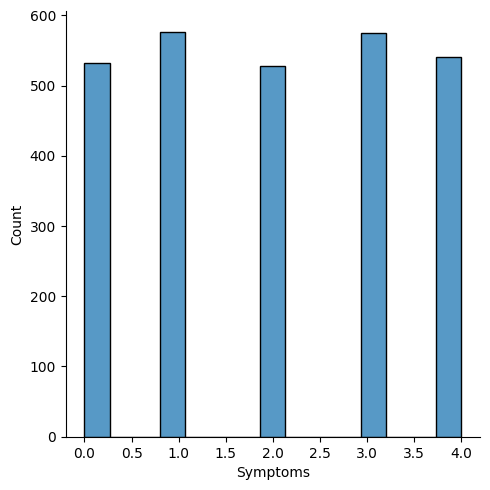

<Figure size 1700x100 with 0 Axes>

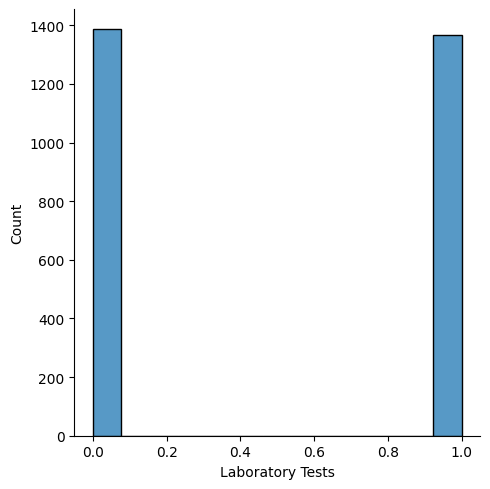

<Figure size 1700x100 with 0 Axes>

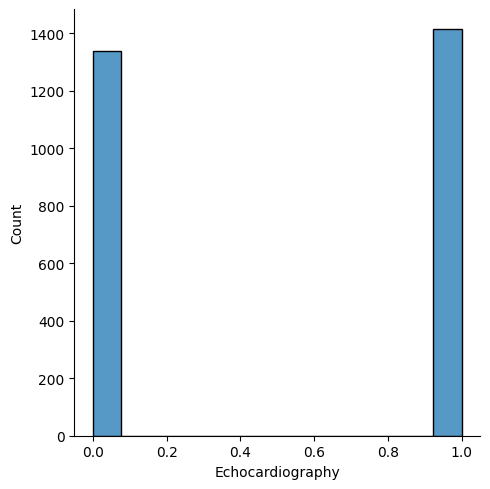

<Figure size 1700x100 with 0 Axes>

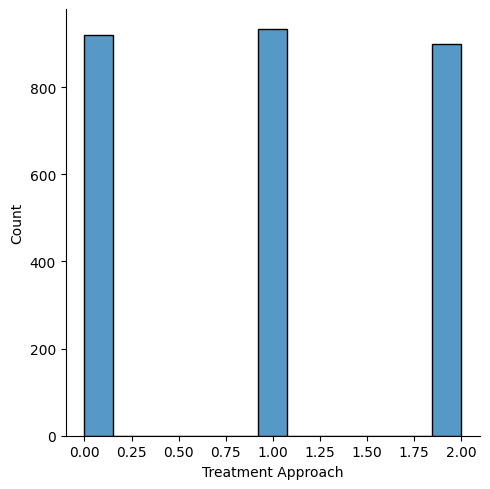

<Figure size 1700x100 with 0 Axes>

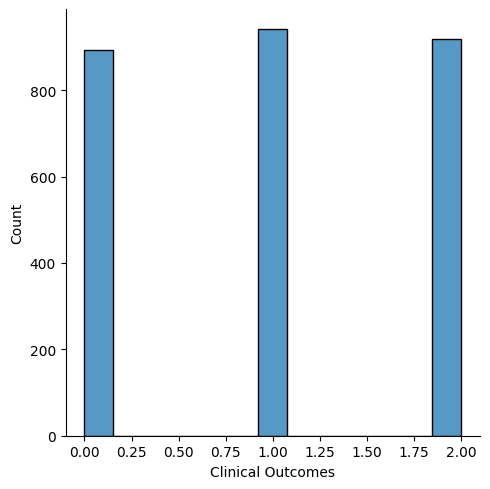

<Figure size 1700x100 with 0 Axes>

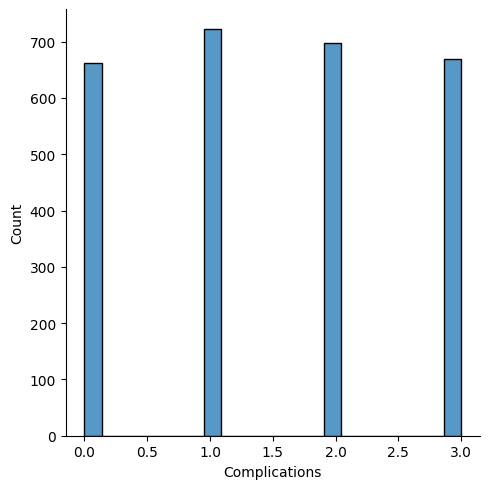

<Figure size 1700x100 with 0 Axes>

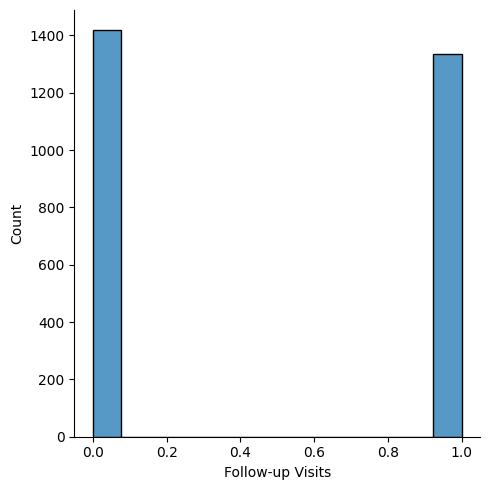

<Figure size 1700x100 with 0 Axes>

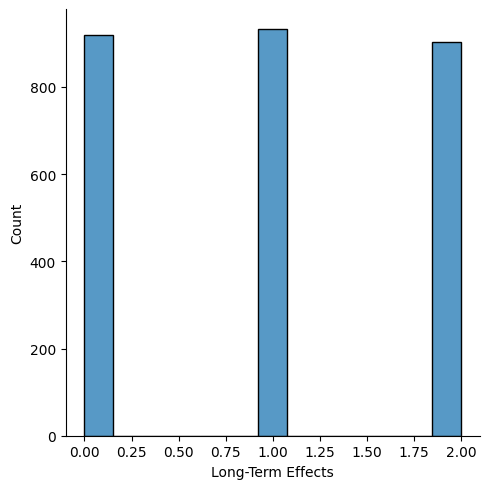

In [105]:
#Printing displot for each numerical column present in the data set
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.displot(data=df1, x=column)
plt.show()

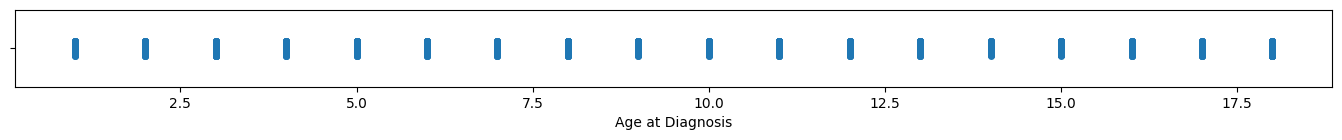

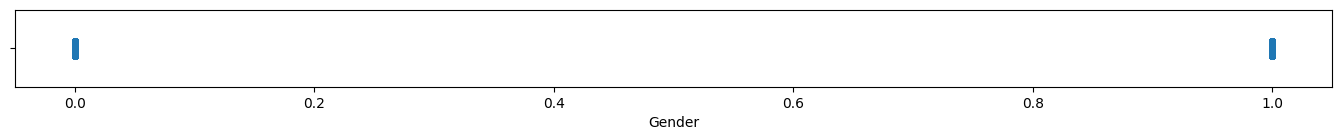

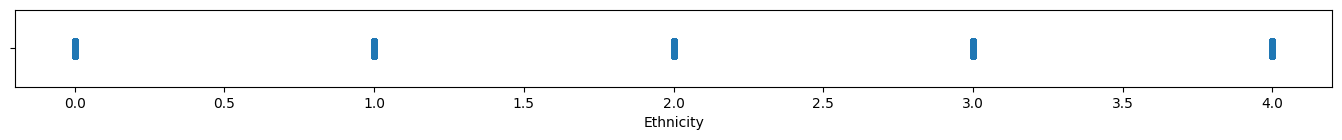

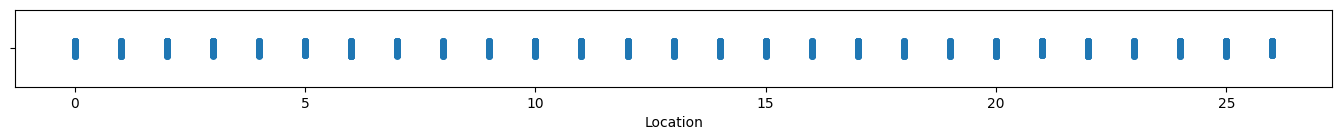

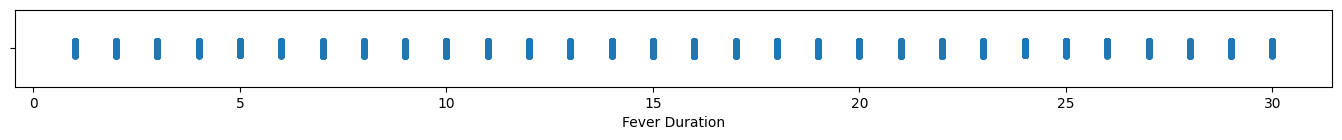

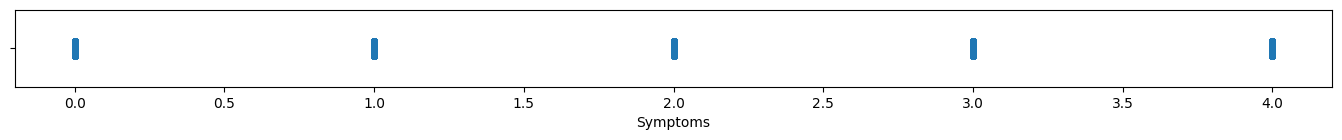

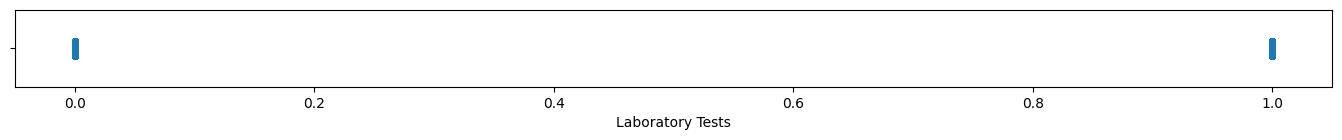

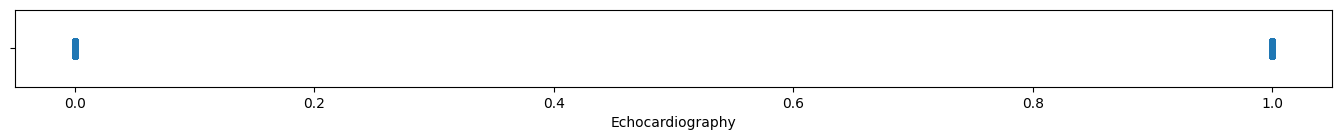

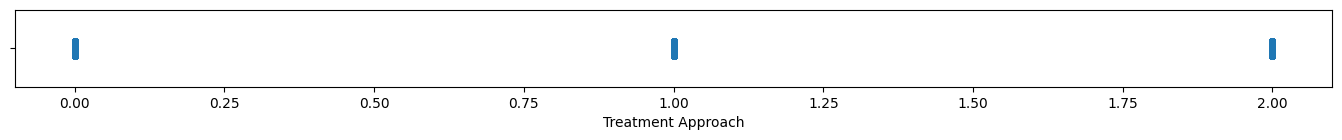

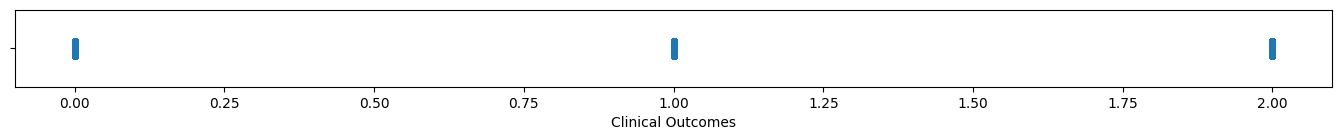

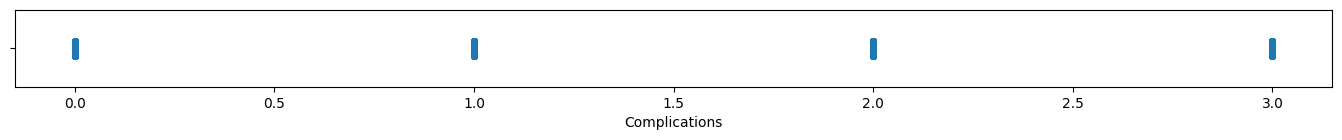

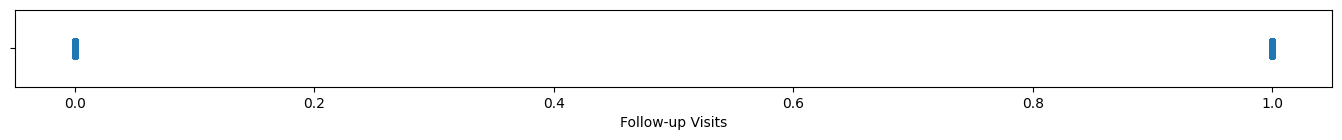

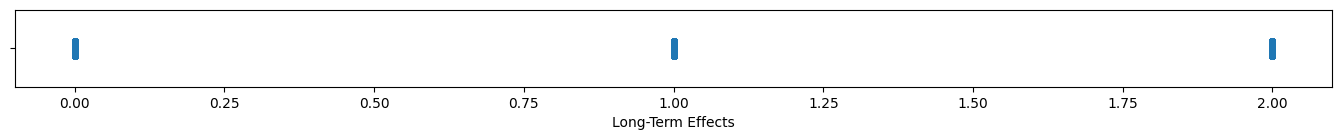

In [106]:
#Printing strip plot for each numerical column present in the data set
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.stripplot(data=df1, x=column)
plt.show()

array([[<Axes: title={'center': 'Age at Diagnosis'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Ethnicity'}>,
        <Axes: title={'center': 'Location'}>],
       [<Axes: title={'center': 'Fever Duration'}>,
        <Axes: title={'center': 'Symptoms'}>,
        <Axes: title={'center': 'Laboratory Tests'}>,
        <Axes: title={'center': 'Echocardiography'}>],
       [<Axes: title={'center': 'Treatment Approach'}>,
        <Axes: title={'center': 'Clinical Outcomes'}>,
        <Axes: title={'center': 'Complications'}>,
        <Axes: title={'center': 'Follow-up Visits'}>],
       [<Axes: title={'center': 'Long-Term Effects'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

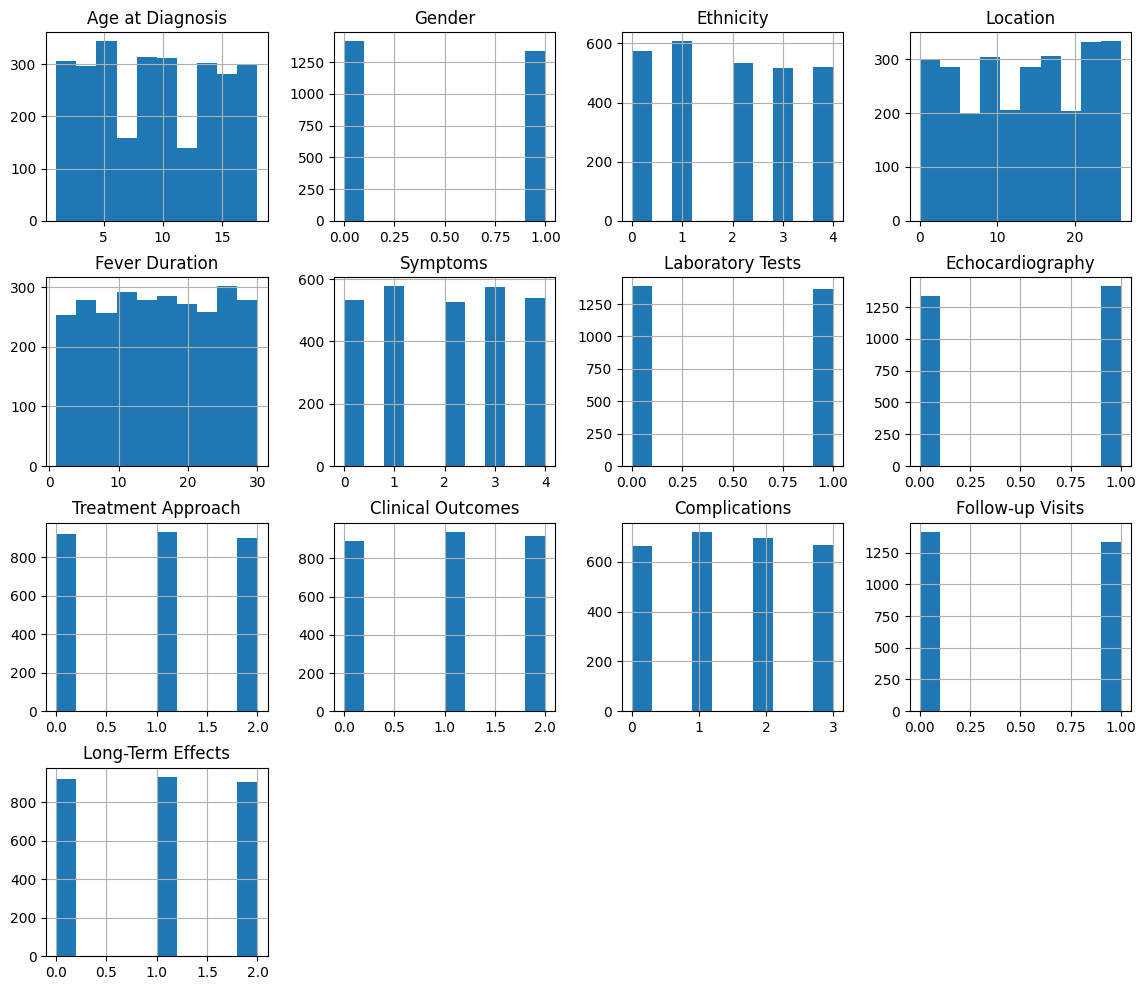

In [107]:
df.hist(figsize = (14,12)) #shows graphically the value counts of each column

A box plot, also known as a box-and-whisker plot, is a graphical representation that displays the distribution, central tendency (median), and spread (interquartile range) of a dataset, making it easy to identify outliers and understand the data's overall variability.

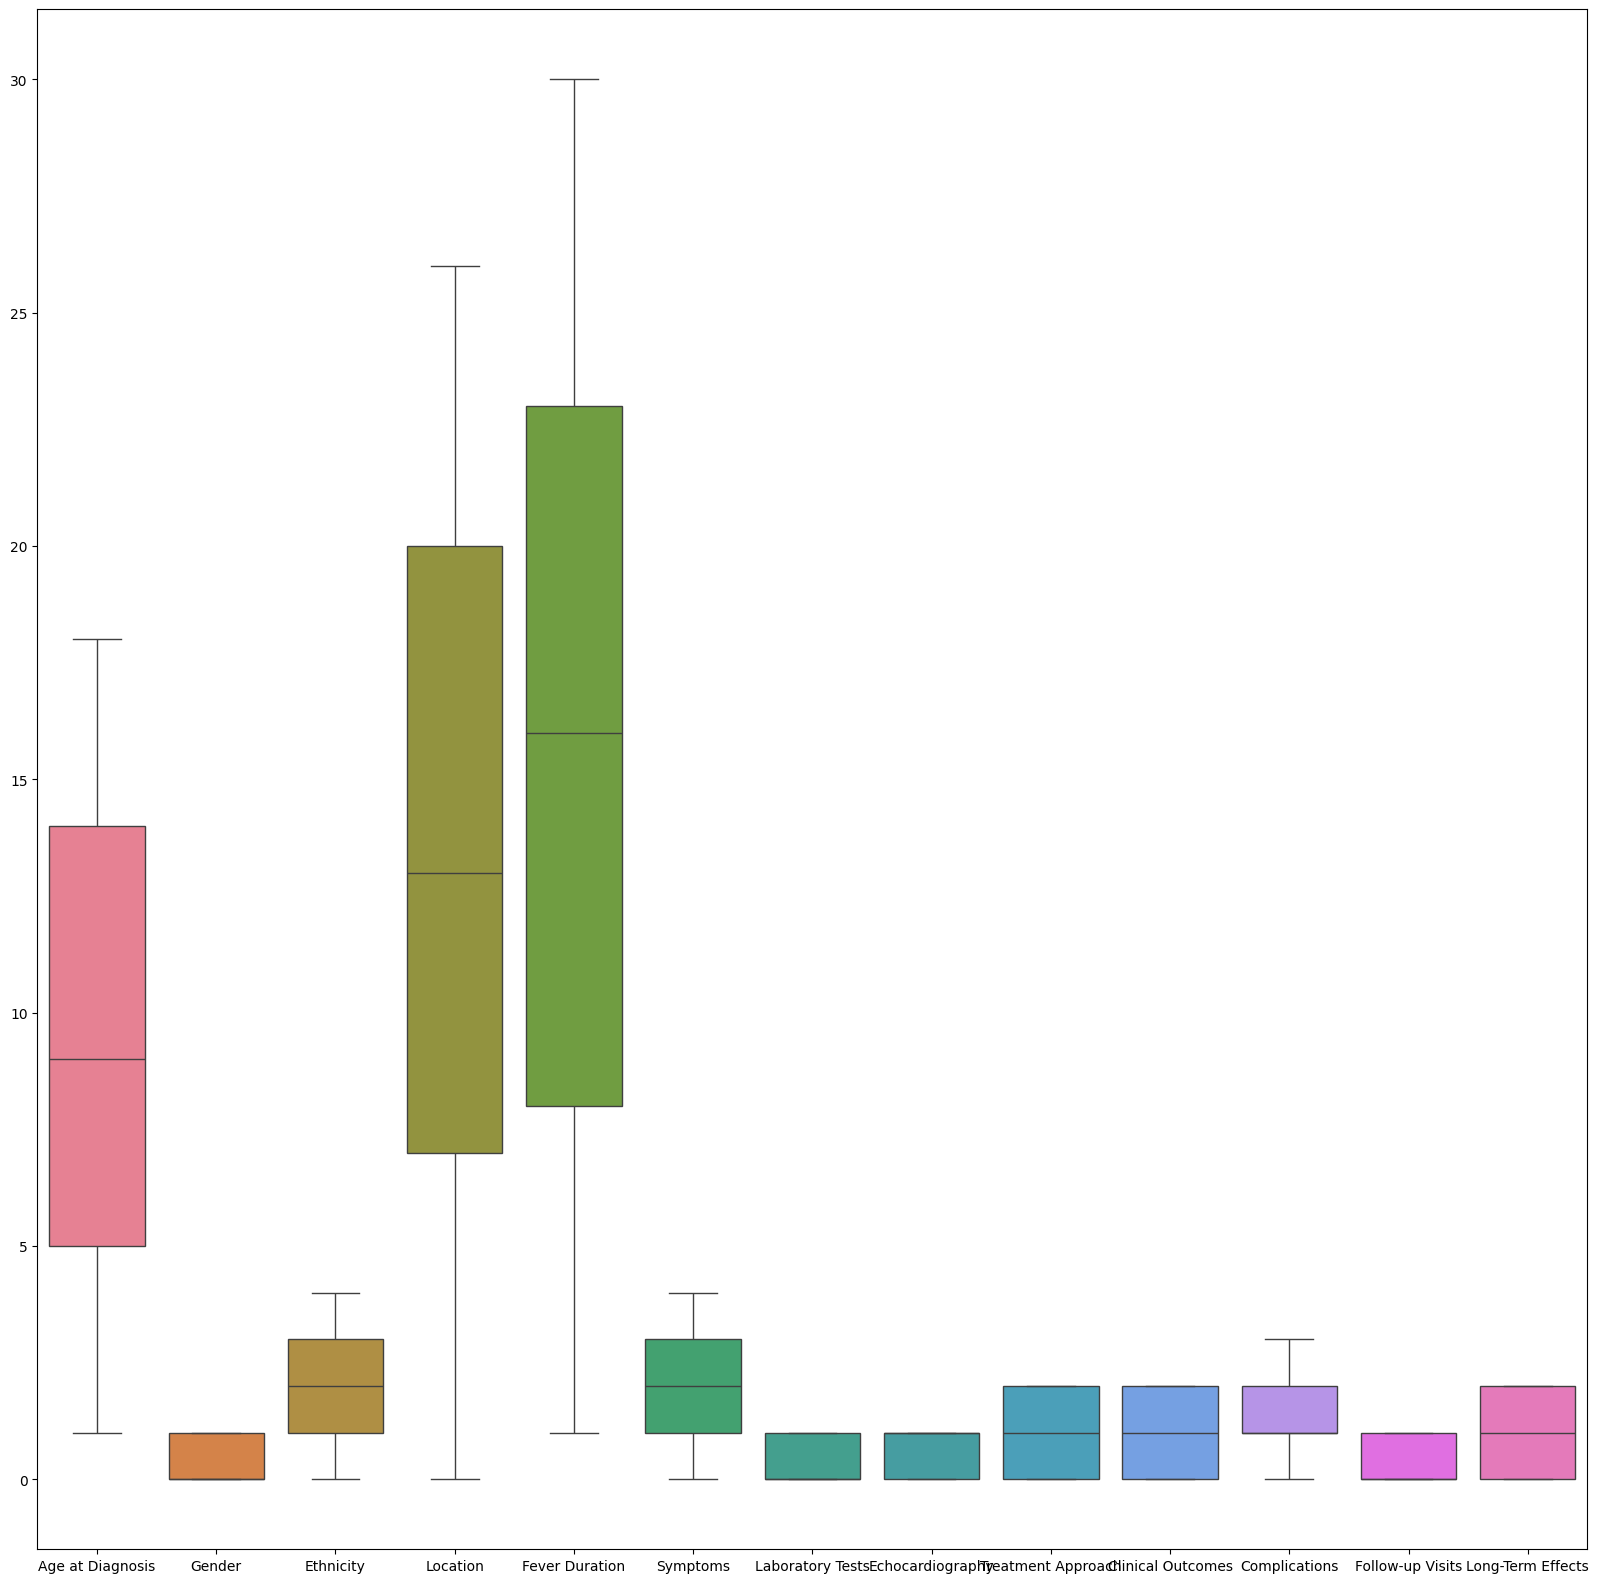

In [108]:
#box plot
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=df)

In [109]:
df.head()

,Age at Diagnosis,Gender,Ethnicity,Location,Fever Duration,Symptoms,Laboratory Tests,Echocardiography,Treatment Approach,Clinical Outcomes,Complications,Follow-up Visits,Long-Term Effects
0,6,1,2,7,25,0,0,1,0,2,1,1,0
1,1,0,1,19,9,1,0,1,0,0,1,0,2
2,4,1,0,16,8,0,0,1,0,0,1,0,2
3,2,1,0,3,19,1,1,1,0,2,0,0,1
4,8,1,0,14,28,1,1,1,0,1,2,1,0


# **Model Building**

#### **K-Means Clustering**

In [110]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [111]:
X = df

In [112]:
X

,Age at Diagnosis,Gender,Ethnicity,Location,Fever Duration,Symptoms,Laboratory Tests,Echocardiography,Treatment Approach,Clinical Outcomes,Complications,Follow-up Visits,Long-Term Effects
0,6,1,2,7,25,0,0,1,0,2,1,1,0
1,1,0,1,19,9,1,0,1,0,0,1,0,2
2,4,1,0,16,8,0,0,1,0,0,1,0,2
3,2,1,0,3,19,1,1,1,0,2,0,0,1
4,8,1,0,14,28,1,1,1,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747,15,0,1,19,23,2,1,0,1,2,2,1,0
2748,10,1,2,25,26,0,1,1,2,1,1,1,0
2749,6,0,4,3,25,1,1,1,0,2,3,1,0
2750,15,1,3,14,21,3,0,0,0,0,2,0,1


In [113]:
from sklearn.metrics import silhouette_score

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have your data stored in the 'X' variable

# Determine the optimal number of clusters (k) using the elbow method
twss = []
silhouette_scores = []
k_range = range(2, 9)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    twss.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))



c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

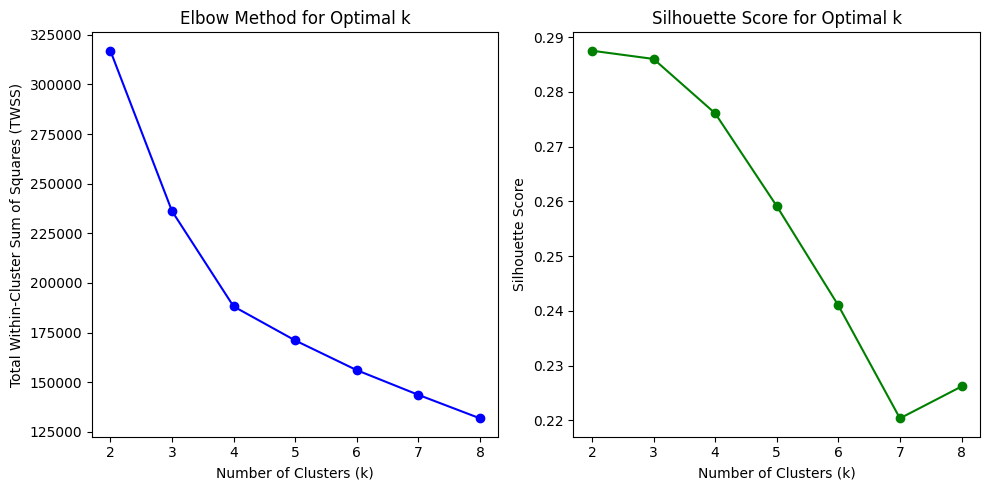

range(2, 9)


In [115]:
# Plot the Elbow Method graph to find the optimal k
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, twss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Total Within-Cluster Sum of Squares (TWSS)')
plt.title('Elbow Method for Optimal k')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='g')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')

plt.tight_layout()
plt.show()
print(k_range)

In [116]:
# print("TWSS:", TWSS)
print("Silhouette Scores:", silhouette_scores)

Silhouette Scores: [0.2875152148157116, 0.28601136813339206, 0.27608490199759045, 0.2591416310298587, 0.24099249161937672, 0.22036582949911288, 0.22618410826814064]



<h1>GaussianMixture</h1>

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture


optimal_n_clusters = 4
data_preprocessed = X

gmm = GaussianMixture(n_components=optimal_n_clusters+2, random_state=0)
gmm.fit(data_preprocessed)

# Predict the cluster assignments for each data point
cluster_assignments = gmm.predict(data_preprocessed)

# Calculate the silhouette score
silhouette_avg = silhouette_score(data_preprocessed, cluster_assignments)
print(f'Silhouette Score: {silhouette_avg}')



Silhouette Score: 0.2235198229861517


Silhouette Score: 0.26


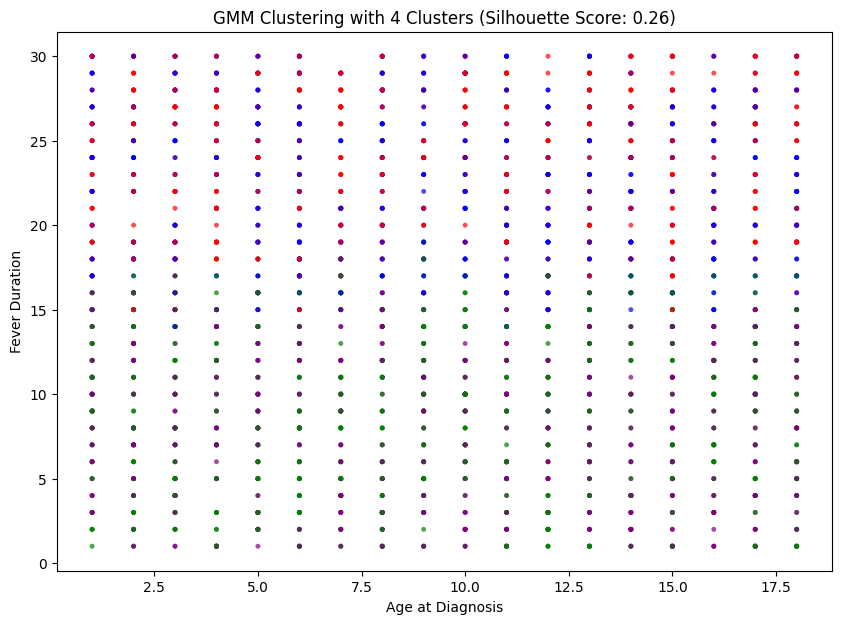

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

optimal_n_clusters = 4
data_preprocessed = X  # Assuming data_preprocessed is a pandas DataFrame

# Create a Gaussian Mixture Model with a specified number of components (optimal_n_clusters + 2)
gmm = GaussianMixture(n_components=optimal_n_clusters, random_state=0)
gmm.fit(data_preprocessed)

# Predict the cluster assignments for each data point
cluster_assignments = gmm.predict(data_preprocessed)

# Calculate the silhouette score
silhouette_avg = silhouette_score(data_preprocessed, cluster_assignments)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Define custom colors for clusters
custom_colors = ['red', 'green', 'blue', 'purple']  # Add more colors if needed

# Plot the data points with custom cluster colors
plt.figure(figsize=(10, 7))
cluster_colors = [custom_colors[label] for label in cluster_assignments]
plt.scatter(data_preprocessed['Age at Diagnosis'], data_preprocessed['Fever Duration'], marker='.', s=50, lw=0, alpha=0.7, c=cluster_colors, edgecolor='k')

# Set plot labels and title
plt.xlabel('Age at Diagnosis')
plt.ylabel('Fever Duration')
plt.title(f'GMM Clustering with {optimal_n_clusters} Clusters (Silhouette Score: {silhouette_avg:.2f})')

# Show the plot
plt.show()


<h1>DBSCAN</h1>

Estimated number of clusters: 3
Estimated number of noise points: 44
Homogeneity: 0.759
Completeness: 0.605
V-measure: 0.673
Adjusted Rand Index: 0.606
Adjusted Mutual Information: 0.669
Silhouette Coefficient: 0.388


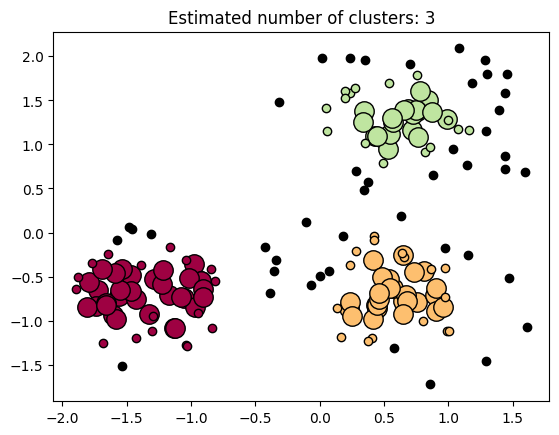

In [119]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=170, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_



# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [120]:
print("Silhouette Score for DBSCAN: %0.2f" % metrics.silhouette_score(X, labels))


Silhouette Score for DBSCAN: 0.39


In [121]:
A = df
print(A.shape)

(2752, 13)


## Hierarchy cluster

In [122]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 

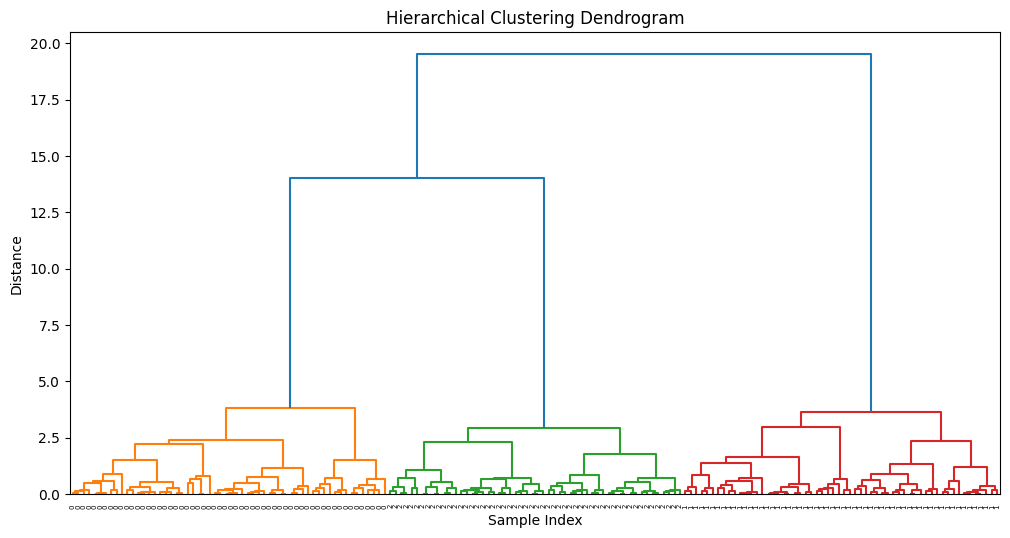

Silhouette Score: 0.62
Davies-Bouldin Index: 0.51


In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming you have a DataFrame named df with your data
# Example data (replace this with your own data)
data = X
df = pd.DataFrame(data)

# Perform hierarchical clustering
n_clusters = 3  # Number of clusters
clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = clustering.fit_predict(df)
# print(cluster_labels)

# Calculate linkage matrix and plot the dendrogram
linkage_matrix = linkage(df, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, orientation='top', labels=cluster_labels, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Calculate silhouette score and Davies-Bouldin index
silhouette_avg = silhouette_score(df, cluster_labels)
davies_bouldin = davies_bouldin_score(df, cluster_labels)

print(f'Silhouette Score: {silhouette_avg:.2f}')
print(f'Davies-Bouldin Index: {davies_bouldin:.2f}')
